### Project Description.
1. Problem.
    1. MNIST : Classification among 10 digits.
    2. Input : 28x28, black and white img, containing one digit in [0,9].
    3. Output : [0,9] that represents the class.
    4. No expert knowledge : from pixel value to the recognition.
    5. Data : MNIST data, 50,000 imgs.
    6. Model : general img classification models.
    7. Supervised/Offline/Model-based/Classification model.
2. Data Preparation.
    1. Offline learning: download (sklearn.datasets).
    2. Validation.
    3. Train-test Split.
3. EDA.
    1. Visualize img of each class.
    2. Class distribution.
4. Model Build.
    1. Model Candidate: DT. SVC. NB. (in scikit-learn)
    2. Model Selection.
    3. Hyperparameter Tunning.
    4. Final Test.
5. Release and Management.

In [15]:
#Global var.
random_seed = 42

#### Data preparation.

In [6]:
#download.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist['data']
y = mnist['target']

(70000, 784)

In [86]:
#Validation.
X.info(max_cols=784)   #data type and null check.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [31]:
from sklearn.model_selection import train_test_split
#train-test.
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=random_seed) 

#train-valid.
X_train_, X_val, y_train_, y_val = \
train_test_split(X_train, y_train, test_size=0.3, shuffle=True, stratify=y_train, random_state=random_seed)
pd.DataFrame(y_train).value_counts()/len(y_train)  #stratified sampling complete!

class
1        0.112531
7        0.104184
3        0.102020
2        0.099857
9        0.099408
0        0.098612
6        0.098224
4        0.097490
8        0.097490
5        0.090184
dtype: float64

#### EDA.

array([[<AxesSubplot:title={'center':'pixel201'}>,
        <AxesSubplot:title={'center':'pixel202'}>,
        <AxesSubplot:title={'center':'pixel203'}>],
       [<AxesSubplot:title={'center':'pixel204'}>,
        <AxesSubplot:title={'center':'pixel205'}>,
        <AxesSubplot:title={'center':'pixel206'}>],
       [<AxesSubplot:title={'center':'pixel207'}>,
        <AxesSubplot:title={'center':'pixel208'}>,
        <AxesSubplot:title={'center':'pixel209'}>]], dtype=object)

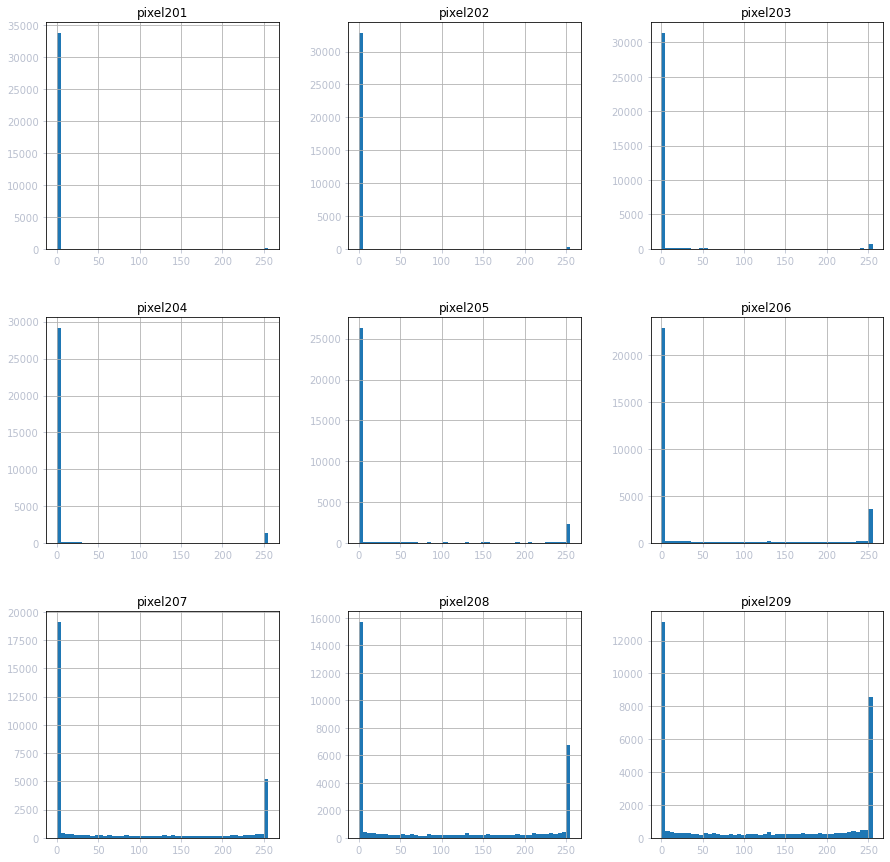

In [108]:
#histogram.
X_train_.iloc[:,200:209].hist(figsize=(15,15), bins=50)

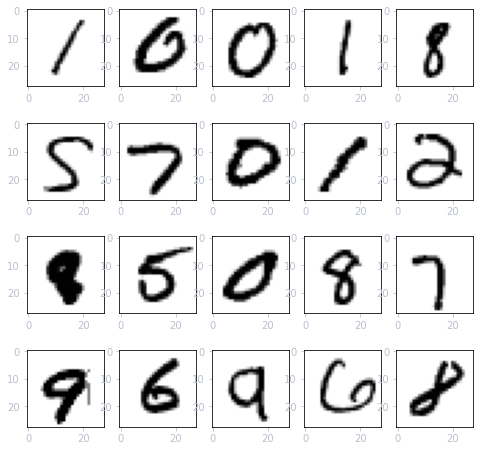

In [78]:
#Show some samples.
import numpy as np
import matplotlib.pyplot as plt

x_samples = X_train_.iloc[0:20].to_numpy().reshape(20,28,28)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8,8))
for i in range(0,4):
    for j in range(0,5):
        axes[i][j].imshow(x_samples[i*5 + j], cmap='gray_r')
y_train_.iloc[10]

#feature engineering.
X.describe()                      #mean/std/quartile for numerical features.
X.hist()
X_train_['pixel1'].value_counts() #useless feature => could be removed!
X_train_.describe().iloc[         #features 1st row are all useless!
    :, 0:28
]

In [ ]:
#correlation analysis.
cor_mat = X_train_.corr()

In [148]:
train_data = X_train_.copy()
train_data['class'] = y_train_
train_data_0 = train_data.loc[train_data['class'] == '8']
cor_mat_0 = train_data_0.corr().fillna(0)          #correlation btw 0s is NaN => fill with 0.
plt.figure(figsize=(15,15))
plt.matshow(cor_mat_0, cmap='gray_r', fignum=1)    #should analyze with higher features!